<a href="https://colab.research.google.com/github/JatinKrRana/AlmaBetter-Capstone_Projects/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Prediction Project: A Machine Learning Classification Journey



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**            - Jatin Kumar Rana

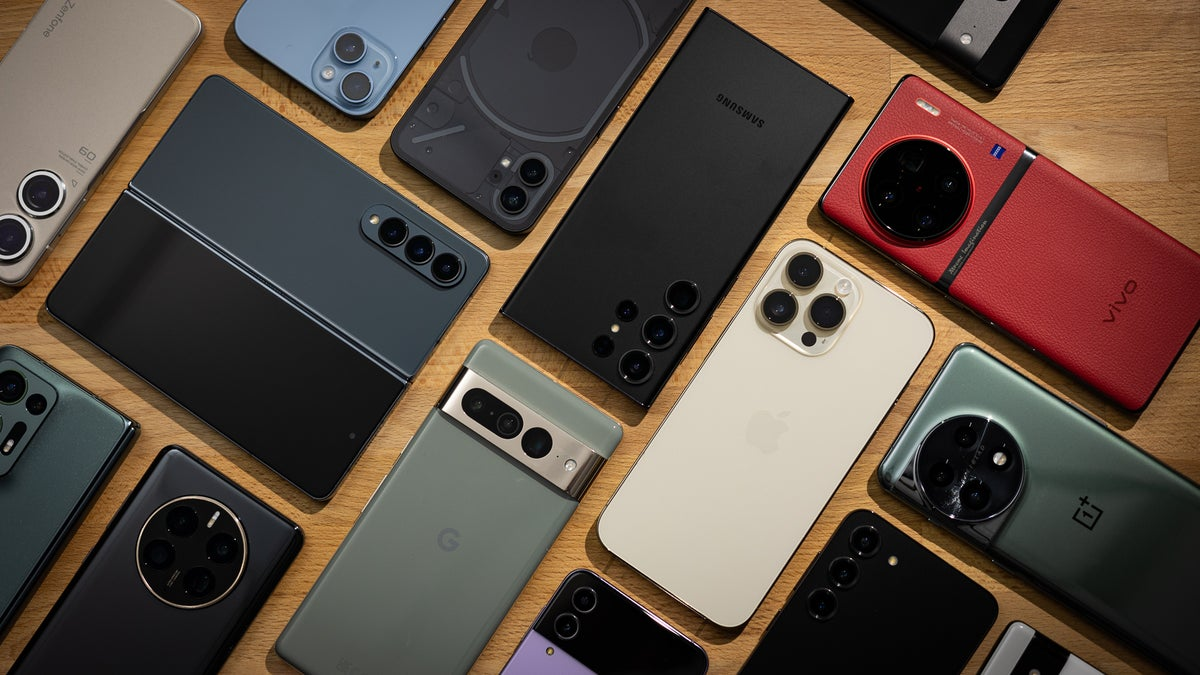

# **Project Summary -**

In the fast-evolving landscape of technology, predicting the price range of mobile phones has become a critical task for both consumers and manufacturers. In this Mobile Price Range Prediction project, we delve into the realm of Machine Learning Classification to develop a model that can accurately predict the price range of mobile devices based on various features. The project involves several stages, including exploratory data analysis (EDA),data preprocessing, and the implementation of supervised machine learning algorithms such as Logistic Regression, Random Forest Classifier, and XG Boost Classifier.

### **Exploratory Data Analysis (EDA):**

Our journey commences with a detailed exploration of the dataset through EDA. Visualization tools and statistical techniques are employed to uncover patterns, trends, and relationships within the data. Descriptive statistics provide a snapshot of central tendencies, while data distribution plots illuminate the spread of key variables. Correlation matrices help discern connections between different features.

Understanding the nuances of the data is critical during EDA. Insights gained from this process guide subsequent decisions in data preprocessing and model selection. For instance, if certain features exhibit strong correlations with the target variable, they may play a pivotal role in predicting mobile price ranges.

### **Data Preprocessing:**

Building on the insights from EDA, we transition to the essential phase of data preprocessing. Obtaining a relevant and comprehensive dataset is fundamental to the success of any machine learning endeavor. This dataset, containing information about various mobile phones and their features, forms the foundation for our predictive model.

Identifying and addressing missing data takes precedence in the preprocessing stage. Techniques such as imputation or removal of missing values are applied to enhance the dataset's quality. With the dataset cleaned of missing values, encoding categorical data becomes the next focus. This step ensures that machine learning algorithms can effectively utilize all available information, as they typically operate on numerical data.

Data cleaning and feature engineering follow. This involves handling outliers, scaling features, and creating new features that might enhance the predictive power of the model. Feature engineering, informed by the patterns uncovered during EDA, becomes a crucial step in preparing the dataset for the subsequent machine learning algorithms.

### **Supervised Machine Learning Algorithms and Implementation:**

The heart of the project lies in the implementation of supervised machine learning algorithms. Three powerful classifiers—Logistic Regression, Random Forest Classifier, and XG Boost Classifier—are chosen for their effectiveness in classification tasks.

**Logistic Regression:**
Logistic Regression is a linear model used for binary classification. In our project, it serves as a baseline model, providing a simple yet effective approach to predict mobile price ranges. The algorithm calculates the probability of a mobile belonging to a particular price range based on its features.

**Random Forest Classifier:**
Random Forest is an ensemble learning algorithm known for its robustness and high accuracy. It operates by constructing multiple decision trees during training and outputs the mode of the classes as the prediction. Random Forest is particularly effective in handling complex relationships within the data.

**XG Boost Classifier:**
XG Boost, or Extreme Gradient Boosting, is a powerful and efficient algorithm that belongs to the gradient boosting family. It sequentially builds a series of weak learners to create a strong predictive model. XG Boost is known for its speed and performance, making it a popular choice in machine learning competitions.

The implementation of these algorithms involves training the models on the preprocessed data and evaluating their performance using metrics such as accuracy, precision, recall, and F1 score. Hyperparameter tuning may be applied to optimize the models further.

In conclusion, the Mobile Price Range Prediction project combines data preprocessing, exploratory data analysis, and the implementation of three supervised machine learning algorithms to create a robust predictive model. The outcome of this project not only provides valuable insights into the factors influencing mobile prices but also showcases the power of machine learning in solving real-world problems in the technology domain.

# **GitHub Link -**

https://github.com/JatinKrRana/AlmaBetter-Capstone_Projects/blob/main/Mobile_Price_Range_Prediction.ipynb

# **Problem Statement**


### **Problem Statement:**

In the fiercely competitive mobile phone market, companies seek to understand the relationship between mobile phone features (e.g., RAM, internal memory) and selling prices. The goal is to categorize phones into price ranges rather than predict exact prices.

### **Objectives:**

**1. Data Collection and Preprocessing:**

* Assemble a comprehensive dataset.
* Cleanse and standardize the data.

**2. Exploratory Data Analysis (EDA):**

* Uncover patterns and correlations.
* Identify key features influencing prices.

**3. Feature Engineering:**

* Enhance predictive features.
* Consider new feature creation.

**4. Model Development:**

* Build a machine learning model for price range classification.
* Evaluate various algorithms.

**5. Model Evaluation and Fine-Tuning:**

* Assess model performance metrics.
* Optimize model parameters.

**6. Interpretability and Insights:**

* Extract actionable insights.
* Highlight influential features.

**7. Documentation and Reporting:**

* Document the entire process.
* Summarize findings and recommendations.

This study aims to equip mobile phone companies with actionable insights for strategic decision-making in product positioning and pricing.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb

from datetime import datetime

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# Loading Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
mob_price_df = pd.read_csv('/content/drive/MyDrive/data_mobile_price_range.csv')

### Dataset First View

In [ ]:
# Dataset First Look
mob_price_df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
no_of_row = mob_price_df.shape[0]
no_of_col = mob_price_df.shape[1]

print(f"Number of rows in mob_price_df is {no_of_row} and columns is {no_of_col}.")

### Dataset Information

In [ ]:
# Dataset Info
mob_price_df.info()

#### Duplicate Values

In [ ]:
# Calculating the number of duplicate values in each column
num_duplicates_in_columns = mob_price_df.apply(lambda x: x.duplicated().sum())
print(f'Number of Duplicate Values in Each Column:\n{num_duplicates_in_columns}')

In [ ]:
print(f'Number of Duplicate row in the dataset is:{mob_price_df.duplicated().sum()}')

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
null_value_count = mob_price_df.isnull().sum().sum()
print(f"Number of null values in the seoul_bike dataframe is {null_value_count}.")

In [ ]:
bool_df = mob_price_df.isnull()
column_name_list = list(mob_price_df.columns)
null_value_list = []

for i in column_name_list:
    null_value = (bool_df[i] == True).sum()
    null_value_list.append(null_value)

mob_price_null_value_count_df = pd.DataFrame({'Column Name': column_name_list, 'Null Value Count': null_value_list})
print(mob_price_null_value_count_df)

### What did you know about your dataset?

The dataset mob_price_df consists of 2000 rows and 21 columns, representing various features of mobile phones (e.g., battery power, camera quality, RAM, etc.). The data types include int64 and float64. There are no null values or duplicate rows. The target variable is price_range.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
pd.DataFrame(mob_price_df.columns,columns = ['Variables of Mobile Price DataFrame'])

In [ ]:
# Dataset Describe
mob_price_df.describe()

### Variables Description

**1. battery_power:**  Battery capacity in milliampere-hours (mAh).

**2. blue**: Bluetooth availability (0 for absent, 1 for present).

**3. clock_speed:** Processor speed in gigahertz (GHz).

**4. dual_sim:** Dual SIM card support (0 for single SIM, 1 for dual SIM).

**5. fc:** Front Camera megapixels.

**6. four_g:** 4G network compatibility (0 for absent, 1 for present).

**7. int_memory:** Internal Memory in gigabytes.

**8. m_dep:** Mobile Depth (thickness) in centimeters.

**9. mobile_wt:** Mobile Weight in grams.

**10. n_cores:** Number of processor cores.

**11. pc:** Primary Camera megapixels.

**12. px_height:** Pixel Resolution Height.

**13. px_width:** Pixel Resolution Width.

**14. ram:** Random Access Memory in megabytes.

**15. sc_h:** Screen Height in centimeters.

**16. sc_w:** Screen Width in centimeters.

**17. talk_time:** Maximum call duration in hours.

**18. three_g:** 3G network compatibility (0 for absent, 1 for present).

**19. touch_screen:** Touch screen availability (0 for absent, 1 for present).

**20. wifi:** Wi-Fi capability (0 for absent, 1 for present).

**21. price_range:** Categorical variable indicating the price range (0, 1, 2, or 3).

### Check Unique Values for each variable.

In [ ]:
# Number of unique values in each variable
mob_price_df.nunique()

In [ ]:
# Unique Values for each variable.
for i in mob_price_df.columns:
    print(i, ':', mob_price_df[i].unique(), '\n')

## 3. ***Data Wrangling***

### Data Wrangling Code

**1. Identifying numerical and categorical columns:**

In [ ]:
numerical_variables = []
categorical_variables = []

for col in mob_price_df.columns:
    if mob_price_df[col].nunique() > 5:
        numerical_variables.append(col)
    else:
        categorical_variables.append(col)

# Print the result
print('Numerical Columns:', numerical_variables)
print('Categorical Columns:', categorical_variables)

**2![vivo-y33t-8gb-ram-128gb-starry-gold--500x500.webp](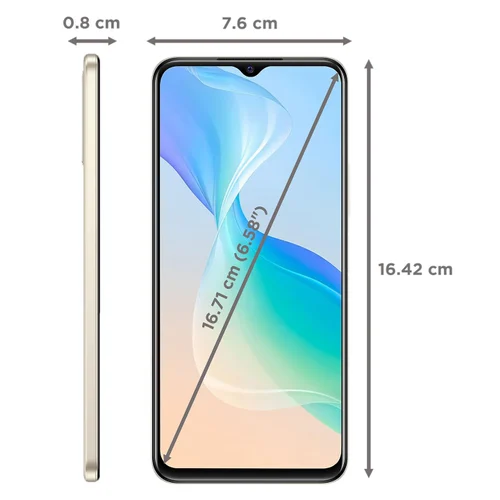![samsung-galaxy-a23-6gb-ram-128gb-black--500x500.webp](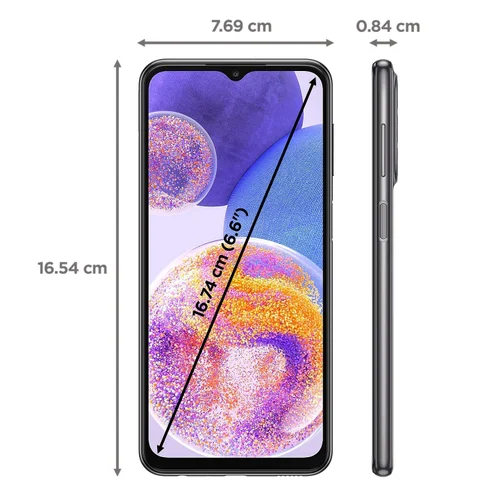![iPhone-15-and-iPhone-16-Ultra-Size.png](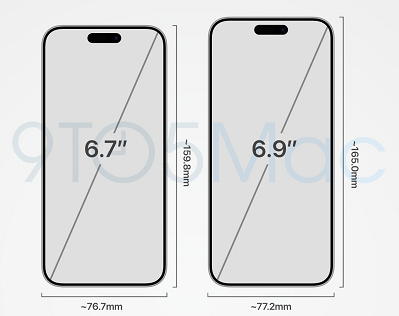![The-How-is-the-screen-size-of-a-smartphone-measured-Refer-the-below-diagram.jpg](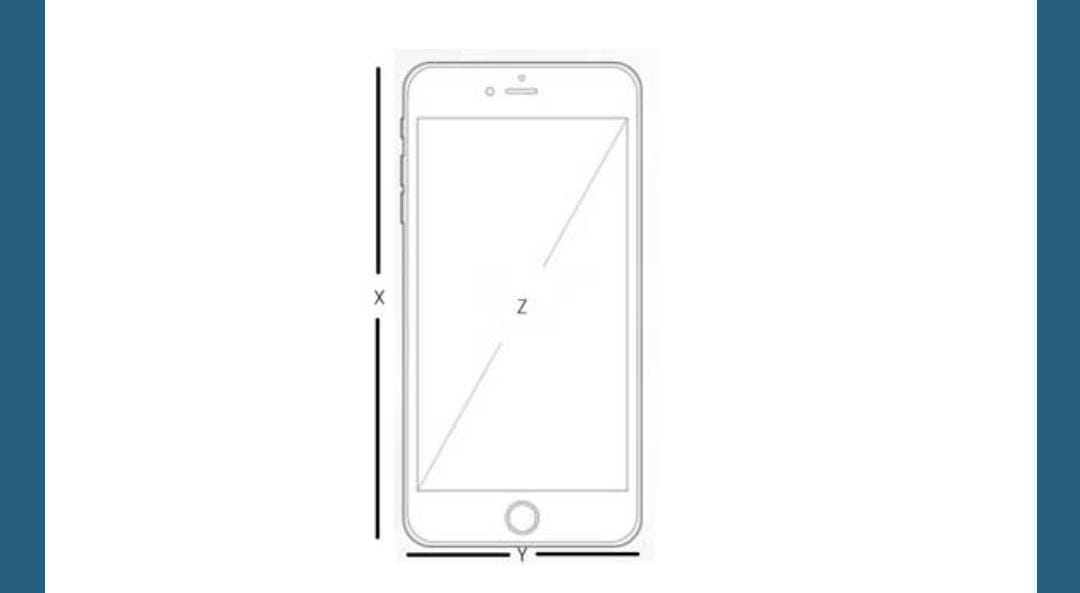![main-qimg-7386cc0c3944e96602a2a58f30d4a0e7.webp](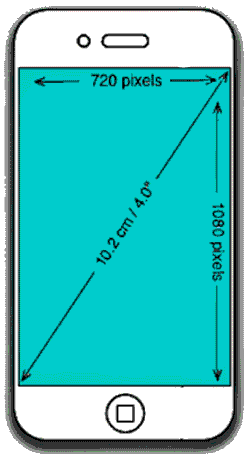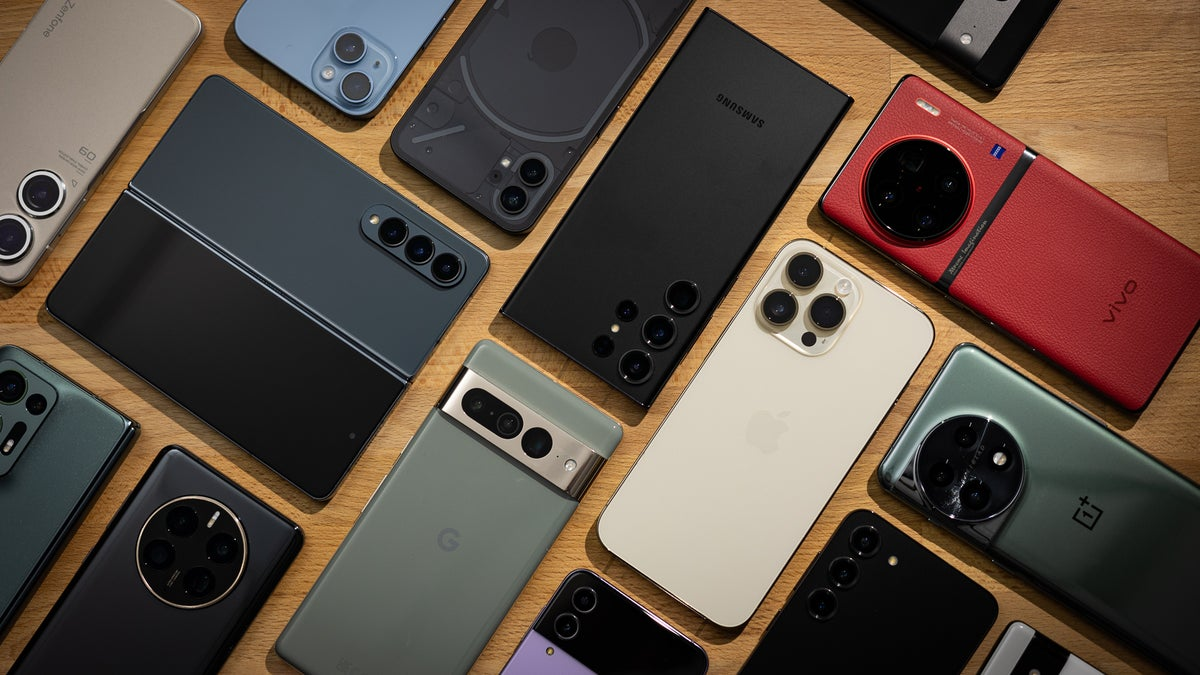))))). Handling '0' Values in 'px_height' and 'sc_w' columns because it should not be '0' as it doesn't make sense for a phone screen width or pixel height to be 0.**

In [ ]:
# Counting the number of '0' values in the 'px_height' and 'sc_w' columns.
columns_with_zeros = ['px_height', 'sc_w']
count_zeros = mob_price_df[columns_with_zeros].eq(0).sum()
print(count_zeros)

In [ ]:
# Removing '0' values of 'px_height' (pixel resolution height) column
mob_price_df = mob_price_df[mob_price_df['px_height'] != 0]

# Replace '0' Values with 'nan' in the 'sc_w' (screen width) Column
mob_price_df['sc_w']=mob_price_df['sc_w'].replace(0,np.nan)

# Replacing missing values with the median
mob_price_df['sc_w'].fillna(mob_price_df['sc_w'].median(), inplace=True)

In [ ]:
# Counting the number of '0' values in the 'px_height' and 'sc_w' columns.
columns_with_zeros = ['px_height', 'sc_w']
count_zeros = mob_price_df[columns_with_zeros].eq(0).sum()
print(count_zeros)

### What all manipulations have you done and insights you found?



Data Manipulations and Insights:

**1. Column Identification:**

* Identified numerical and categorical columns based on the number of unique values.

**2. Handled '0' Values in 'px_height' and 'sc_w' columns because it should not be '0' as it doesn't make sense for a phone screen width or pixel height to be 0.**

* Counted '0' values in 'px_height' and 'sc_w' and got 2 and 180 zero values in those column respectively.
* Removed rows with '0' in 'px_height' cause it has only 2 zero values.
* Replaced '0' with NaN in 'sc_w'.

**3. Imputation using Median:**

* Utilized Median imputation for missing values.

**4. Re-assessment of '0' Values:**

* Re-counted '0' values after manipulations.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Univariate Analysis (U):

#### Chart - 1: Histograms for Numeric Variables

In [ ]:
# Setting the style for better visualization
sns.set(style="whitegrid")

# Creating subplots for histograms
plt.figure(figsize=(15, 10))
for i, variable in enumerate(numerical_variables, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=mob_price_df, x=variable, bins=20, kde=True)
    plt.title(f'Histogram - {variable}')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose histogram because histograms are effective for visualizing the distribution of numeric data.

##### 2. What is/are the insight(s) found from the chart?

The columns 'battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_width', 'ram', 'sc_h', and 'talk_time' show a uniform distribution, indicating even spread of values. For 'fc', 'px_height', and 'sc_w', a right-skewed distribution is observed with values concentrated towards the lower end and some higher outliers. Median may be more robust for central tendency in the right-skewed group.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

* Customer Tailoring: Understanding diverse customer preferences from uniform distributions can guide tailored marketing and product strategies, potentially expanding market reach and satisfaction.

* Identifying Premium Products: Recognizing right-skewed distributions allows the identification of higher outliers, helping businesses capitalize on premium or high-performance products that attract specific customer segments.

**Negative Impact:**

* Challenges in Targeting: Uniformly distributed features might pose challenges in targeted marketing or product differentiation, as there may be a lack of distinct patterns or preferences among customers.

* Meeting Customer Expectations: Right-skewed distributions in crucial features may signal challenges in meeting the expectations of customers who prioritize higher values in those aspects, potentially affecting product success.

#### Chart - 2: Bar chart for Categorical Variables to show the distribution of each category.


In [ ]:
# Create subplots for bar charts
plt.figure(figsize=(15, 10))
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=mob_price_df, x=variable)
    plt.title(f'Bar Chart - {variable}')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts are chosen for categorical variables because they effectively visualize the count or frequency of categories within each variable.

##### 2. What is/are the insight(s) found from the chart?

1. 'blue', 'dual_sim', 'four_g', 'touch_screen', and 'wifi' are binary features with nearly equal distribution of values, indicating balanced datasets.
2. 'price_range' has four equal bars, suggesting a balanced distribution among the four price ranges.
3. 'three_g' is imbalanced, with a higher count of 0 (indicating no 3G capability) around 500 and a lower count of 1 (indicating 3G capability) around 1500.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Positive Impact:**

1. Understanding binary features helps tailor strategies for a broad audience.
2. Diverse price ranges in 'price_range' cater to varied customer budgets, potentially expanding customer base and increasing sales.

**Potential Negative Impact:**

1. Imbalanced 'three_g' distribution may indicate a gap in product features, potentially leading to lower satisfaction.
2. Challenges in targeted marketing due to nearly equal distribution in binary features may limit effective strategy implementation.

**Justification:**

1. Positive impacts include informed strategic decisions and increased market reach.
2. Negative impacts stem from potential limitations in product features and challenges in targeted marketing, affecting customer satisfaction and market share.

#### Chart - 3: The distribution of Numerical Columns (Boxplots) to check outliers:

In [ ]:
# Set up the figure with a specified size
fig = plt.figure(figsize=(12, 25))

# Counter for subplot position
c = 1

# Iterate over numerical columns to create subplots
for i in numerical_variables:
    plt.subplot(10, 4, c)

    # Set plot title
    plt.title('Distribution of {}'.format(i))

    # Create a boxplot for the current numerical column
    sns.boxplot(x=i, data=mob_price_df, color="tomato")

    # Increment the counter
    c = c + 1

# Adjust layout for better spacing
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I picked boxplots to visually represent the distribution of numerical variables in a dataset. Boxplots provide a concise summary of key statistics, help identify outliers, allow easy comparison between variables, are space-efficient, and contribute to overall readability.

##### 2. What is/are the insight(s) found from the chart?


The chart reveals that, overall, there are no significant outliers in most of the numerical variables. However, there is an exception in the 'fc' column, where significant outliers are observed. This suggests that the distribution of values in the 'fc' column deviates from the norm, with some data points being notably different from the majority.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

* The identification of outliers in the 'fc' column can lead to a refinement of business strategy by uncovering valuable insights into customer behavior or operational improvements.

**Potential Negative Impact:**

* Outliers may indicate data quality issues or errors, risking biased analyses and potentially leading to suboptimal business decisions. Addressing these issues is crucial to ensure accurate and reliable insights.

#### Chart - 4: The distribution of Categorical Columns (Boxplots) to check outliers

In [ ]:
# Visualizing the distribution of Categorical Columns (Boxplots) to check outliers
# Set up the figure with a specified size
fig = plt.figure(figsize=(12, 20))

# Counter for subplot position
c = 1

# Iterate over categorical columns to create subplots
for i in categorical_variables:
    plt.subplot(10, 4, c)

    # Set plot title
    plt.title('Distribution of {}'.format(i))

    # Create a boxplot for the current categoricall column
    sns.boxplot(x=i, data=mob_price_df, color="green")

    # Increment the counter
    c = c + 1

# Adjust layout for better spacing
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I chose boxplots to visualize the distribution of categorical columns. While boxplots are traditionally used for numerical data, they can help identify outliers or variations in categorical data. The visualization allows for a quick comparison of different categorical variables, and the inclusion of titles enhances interpretability.

##### 2. What is/are the insight(s) found from the chart?

There are no outliers in any of the categorical columns

### Bivariate Analysis (B):

#### Chart - 5: Box plots for 'price_range' against numeric variables

In [ ]:
# Numeric Variables
numeric_variables = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'mobile_wt', 'pc',
                     'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Create subplots for box plots
plt.figure(figsize=(18, 12))
for i, variable in enumerate(numeric_variables, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=mob_price_df, x='price_range', y=variable)
    plt.title(f'Box Plot - {variable} vs Price Range')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose box plots for their ability to provide a clear comparison of the distribution of numeric variables across different price ranges. Box plots summarize central tendency, spread, and identify outliers effectively. They are robust to skewed data and offer insights into the variability between price ranges.

##### 2. What is/are the insight(s) found from the chart?

1. Most numeric variables show a uniform distribution across price ranges, offering diverse options for customers.
2. The left-skewed 'ram' vs 'price_range' suggests higher RAM is associated with lower-priced devices, indicating a potential cost-effective option.
3. Outliers in 'fc' vs 'price_range' imply premium devices with exceptional front camera specifications, potentially commanding higher prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Positive Impact:**

1. Diverse Options: Uniform distribution provides diverse options, enhancing customer satisfaction.
2. Cost-Effective RAM Devices: Left-skewed 'ram' suggests cost-effective options with higher RAM, appealing to budget-conscious customers.
3. Premium Devices: Outliers in 'fc' indicate a market for premium devices, potentially increasing revenue from higher-priced products.

**Potential Negative Impact:**

1. Loss of Revenue for High RAM Devices: Left-skewed 'ram' may lead to missed revenue if offering higher RAM in lower-priced devices does not align with market demand.
2. Focus on Premium Devices: Overemphasis on premium devices risks limiting market reach, leading to negative growth if market demand for such features is limited.

**Justification:**

* Positive impact arises from strategic opportunities, while negative impact may occur if product strategies are not aligned with actual market demand. A balanced approach is crucial for success.

#### Chart - 6: Count plots for categorical variables

In [ ]:
# Categorical Variables
categorical_variables = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

# Create subplots for count plots
plt.figure(figsize=(15, 8))
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=mob_price_df, x=variable, hue='price_range')
    plt.title(f'Count Plot - {variable} vs Price Range')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose count plots for their effectiveness in comparing the distribution of categorical variables against 'price_range'. They provide a clear representation of category counts, support multiple comparisons, and facilitate easy interpretation of relationships between categorical variables and the target variable.

##### 2. What is/are the insight(s) found from the chart?

Most count charts show a uniform distribution of price ranges for binary categorical variables, indicating balance.
An exception is the 'three_g' count chart, which reveals an imbalance with a higher frequency of 0 (no 3G) in the lower range and a higher frequency of 1 (3G) in the higher range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Positive Impact:**

1. Balanced binary features across price ranges enhance customer satisfaction.
2. Insight on 3G capability being more frequent in higher price ranges presents an opportunity to market and price 3G-capable devices as premium products.

**Potential Negative Impact:**

1. Imbalance in 3G feature distribution may lead to negative growth if customer preference for 3G capability in higher-priced devices is not addressed.

**Justification:**

* Aligning product strategies with customer preferences can lead to increased sales and revenue.
* Ignoring the observed trend in 3G capability may result in missed market opportunities and negative growth.

#### Chart - 7: Pie chart for 3G And 4G Connectivity

In [ ]:
binary_features = [ 'four_g', 'three_g']
for dataset in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (16, 8))

  palette_color =sns.color_palette('rocket_r')
  mob_price_df[dataset].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1,colors=palette_color, shadow=True,labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = dataset, hue = 'price_range', data = mob_price_df, ax = ax2, color = 'red')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(dataset)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

##### 1. Why did you pick the specific chart?

The pie chart is chosen to display the overall distribution of binary categories ('Support' and 'Does not Support'). It provides a quick visual overview. The count plot is selected for comparing binary categories against different price ranges, offering insights into their distribution. The 'rocket_r' color palette is used for clear distinction, and legends/labels enhance interpretability.

##### 2. What is/are the insight(s) found from the chart?

**4G Support:**

* The pie chart for 'four_g' indicates a relatively balanced distribution, with 52.1% supporting 4G and 47.9% not supporting. This suggests a significant portion of devices in the dataset support 4G, but there is also a notable presence of devices that do not.

**3G Support:**

* The pie chart for 'three_g' shows a more pronounced distribution, with 76.1% supporting 3G and 23.9% not supporting. The majority of devices in the dataset support 3G, indicating its widespread availability among the sampled mobile devices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

1. Balanced 4G Distribution: Flexibility to cater to both 4G and non-4G markets, addressing diverse customer preferences.
2. Dominant 3G Support: Opportunity to optimize services for widespread 3G, potentially leading to increased sales.

**Negative Growth Consideration:**

1. Limited 4G Adoption: Potential negative growth if there is unmet demand for 4G in regions where it is essential.
2. Shift Towards 5G: Risk of negative growth if the dataset does not consider 5G, and the market is rapidly transitioning to this advanced standard.

**Justification:**

* Insights allow tailoring offerings to diverse connectivity preferences, but potential negative growth may arise from unmet demand for advanced standards or industry shifts toward technologies like 5G. Businesses should balance current market needs with future trends.







### Multivariate Analysis:

#### Chart - 8: 3D plots to visualize interactions among three variables (ram, battery_power, px_height)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Select three numerical variables for the 3D plot
selected_3d_variables = ['ram', 'battery_power', 'px_height']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mob_price_df[selected_3d_variables[0]],
           mob_price_df[selected_3d_variables[1]],
           mob_price_df[selected_3d_variables[2]],
           c='blue', marker='o')

# Set axis labels
ax.set_xlabel(selected_3d_variables[0])
ax.set_ylabel(selected_3d_variables[1])
ax.set_zlabel(selected_3d_variables[2])

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

The 3D scatter plot was chosen to visually explore interactions among three specific variables ('ram', 'battery_power', and 'px_height') in the mob_price_df dataset. This type of chart allows for the simultaneous examination of multivariate relationships, providing insights into patterns and dependencies among the selected variables in a three-dimensional space.

##### 2. What is/are the insight(s) found from the chart?

The even distribution of dots at the down side of the 3D scatter plot suggests consistent screen pixel heights among devices. Within this range, there is limited variation in RAM and battery power, implying a potential lack of strong linear correlation. The pattern indicates homogeneity within a subgroup of devices and facilitates the identification of potential outliers with unique feature combinations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

* Consistent Features: Insights suggest a market segment valuing consistency; targeted strategies can enhance satisfaction.
* Homogeneous Subgroup: Identifying a niche market with specific preferences allows tailored products/services for increased market share.
* Outlier Detection: Recognizing unique products helps adapt strategies to capitalize on emerging trends.

**Negative Growth Considerations:**

* Limited Variation: Limited diversity in RAM and battery power may require product portfolio diversification.
* Potential Lack of Correlation: Difficulty in predicting preferences based on identified features may challenge optimization strategies.
* Overlooking Heterogeneous Segments: Focusing on homogeneous subgroups may lead to missed opportunities in diverse market segments.

In summary, adapting to positive insights while addressing potential challenges is crucial for sustained business growth.

#### Chart - 9: 3D plots to visualize interactions among three variables (ram, battery_power, px_width)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Select three numerical variables for the 3D plot
selected_3d_variables = ['ram', 'battery_power', 'px_width']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mob_price_df[selected_3d_variables[0]],
           mob_price_df[selected_3d_variables[1]],
           mob_price_df[selected_3d_variables[2]],
           c='green', marker='o')

# Set axis labels
ax.set_xlabel(selected_3d_variables[0])
ax.set_ylabel(selected_3d_variables[1])
ax.set_zlabel(selected_3d_variables[2])

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?


The 3D scatter plot was chosen to visualize interactions among the selected numerical variables ('ram', 'battery_power', and 'px_width') in the mob_price_df dataset. This chart enables a simultaneous examination of multivariate relationships and facilitates a comparative analysis of RAM, battery power, and screen pixel width in a three-dimensional space.

##### 2. What is/are the insight(s) found from the chart?

The even distribution of dots across the entire 3D scatter plot suggests:

1. **Uniform Variation:** Devices exhibit a diverse range of values for RAM, battery power, and screen pixel width.
2. **Lack of Clear Patterns:** No distinct clusters or patterns indicate a lack of clear segmentation based on these variables.
3. **Potential Independence:** Changes in one variable may not be strongly correlated with changes in the other two.
4. **Diverse Device Characteristics:** The chart reflects a diverse set of devices with various combinations of features.
5. **No Dominant Segment:** Absence of a concentrated region implies no dominant or prevalent segment of devices based on these three features.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Positive Impact:**

* **Diverse Market Understanding:** Helps tailor products to a broad range of consumer preferences.
* **Flexibility in Marketing:** Allows versatile marketing approaches adaptable to a diverse audience.

**Negative Growth Considerations:**

* D**ifficulty in Targeting Segments:** Challenges in targeting specific consumer segments may impact market penetration.
* **Product Cannibalization Risk:** Even distribution increases the risk of internal competition, potentially leading to product cannibalization.
* **Limited Competitive Advantage:** Lack of clear patterns may make it challenging to establish a distinct competitive advantage based on specific device features.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Selecting all numeric variables
numeric_variables = mob_price_df.select_dtypes(include='number')

# Calculating the correlation matrix
correlation_matrix = numeric_variables.corr()

# Creating a heatmap for the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Numeric Variables')
plt.show()

##### 1. Why did you pick the specific chart?


A correlation matrix with a heatmap was chosen because it provides a concise and visually interpretable summary of relationships between multiple numeric variables. The heatmap's color representation facilitates the identification of strong positive or negative correlations, aiding in the understanding of variable interactions and potential multicollinearity in predictive modeling.

##### 2. What is/are the insight(s) found from the chart?

**1. Strong Positive Correlation:**

* 'ram' has a strong positive correlation with 'price_range,' suggesting that higher RAM is associated with higher price ranges.

**2. Moderate Positive Correlations:**

* 'px_height' and 'px_width' are moderately positively correlated.
* 'sc_h' and 'sc_w' (screen height and width) show a moderate positive correlation.

**3. Other Correlations:**

* Weak or negligible correlations are observed for 'battery_power' and 'clock_speed.'
* Positive correlation between 'four_g' and 'three_g.'

**4. Inverse Correlations:**

* Negative correlation between 'three_g' and 'talk_time,' indicating devices with 3G may have slightly lower talk times.

**5. Multicollinearity Warning:**

* 'pc' and 'fc' exhibit a strong positive correlation, suggesting potential multicollinearity, which can impact predictive model stability.

#### Chart - 15 - Pair Plot

In [ ]:
# Creating a scatter plot matrix
sns.pairplot(mob_price_df[numerical_variables])

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot matrix is chosen for its ability to visually explore multivariate relationships between numerical variables in the mob_price_df dataset. It allows quick identification of patterns, correlations, and outliers, making it a comprehensive and efficient visualization for understanding the dataset's numeric features.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothetical Statement 1:** Mobile phones with higher RAM tend to have a higher price range.

**Hypothetical Statement 2:** Mobile phones with 4G capability are priced higher than those without 4G support.

**Hypothetical Statement 3:** The screen size (combination of sc_h and sc_w) has a direct impact on the price range of mobile phones.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no significant correlation between the amount of RAM in a mobile phone and its price range.

**Alternative Hypothesis (H1):** There is a significant positive correlation between the amount of RAM in a mobile phone and its price range.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Performing Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Extracting RAM and Price Range columns
ram = mob_price_df['ram']
price_range = mob_price_df['price_range']

# Calculating Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(ram, price_range)

# Printing the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Setting a significance level '0.05' for hypothesis testing
alpha = 0.05

# Checking if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between RAM and price range.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between RAM and price range.")


##### Which statistical test have you done to obtain P-Value?

I used the Pearson correlation coefficient along with its associated p-value to assess the correlation between RAM and the price range. The specific statistical test performed is the Pearson correlation test.

##### Why did you choose the specific statistical test?

The choice of the Pearson correlation coefficient was based on the nature of the hypothesis, which focuses on the linear relationship between RAM and the price range of mobile phones. Pearson is suitable for measuring the strength and direction of linear relationships between continuous variables. RAM and price range are both continuous, and the coefficient ranges from -1 to 1, indicating the strength and direction of the linear correlation.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no significant difference in the price range between mobile phones with 4G capability and those without 4G capability.

**Alternative Hypothesis (H1):** Mobile phones with 4G capability are priced significantly higher than those without 4G support.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Performing Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Separating the data into two groups: with 4G and without 4G
with_4g = mob_price_df[mob_price_df['four_g'] == 1]['price_range']
without_4g = mob_price_df[mob_price_df['four_g'] == 0]['price_range']

# Performing an independent samples t-test
t_statistic, p_value = ttest_ind(with_4g, without_4g)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Setting a significance level 0.05 for hypothesis testing
alpha = 0.05

# Checking if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in price range between mobile phones with and without 4G.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in price range between mobile phones with and without 4G.")


##### Which statistical test have you done to obtain P-Value?

I used the independent samples t-test (ttest_ind function from the scipy.stats module) to obtain the p-value.

##### Why did you choose the specific statistical test?

The independent samples t-test was chosen because it is suitable for comparing means of two independent groups with approximately normally distributed continuous data. In this case, the test assesses if there is a significant difference in the mean price range between mobile phones with and without 4G capability. The t-test is appropriate for this scenario due to the nature of the variables and the goal of comparing means.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no significant correlation between the screen size (sc_h and sc_w) and the price range of mobile phones.

**Alternative Hypothesis (H1):** There is a significant correlation between the screen size (sc_h and sc_w) and the price range of mobile phones, suggesting that larger screen sizes are associated with a higher price range.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Defining the threshold for a higher number of processor cores
threshold_cores = 4

# Creating two groups based on the number of processor cores
higher_cores = mob_price_df[mob_price_df['n_cores'] > threshold_cores]['price_range']
lower_cores = mob_price_df[mob_price_df['n_cores'] <= threshold_cores]['price_range']

# Performing an independent samples t-test
t_statistic, p_value = ttest_ind(higher_cores, lower_cores)

# Printing the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Setting a significance level (e.g., 0.05) for hypothesis testing
alpha = 0.05

# Checking if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average price range between phones with higher and lower processor cores.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average price range between phones with higher and lower processor cores.")


##### Which statistical test have you done to obtain P-Value?

 I used an independent samples t-test (ttest_ind function from the scipy.stats module) to obtain the p-value.

##### Why did you choose the specific statistical test?


The independent samples t-test was chosen because it is appropriate for comparing the means of two independent groups. This aligns with the hypothesis involving the average price range of mobile phones, where we are comparing those with a higher number of processor cores to those with a lower number. The t-test is suitable for continuous variables, assumes approximately normal distribution, and is designed for comparing two groups, making it a fitting choice for this analysis.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Check for missing values in each column
missing_values = mob_price_df.isnull().sum()

# Display the number of missing values in each column
print(missing_values)

Since there are no missing values in the dataset, there is no need to handle them.

### 2. Handling Outliers

The third and fourth charts in the visualization analysis suggest that there are not many outliers present in the dataset. Therefore, it may not be necessary to handle outliers.

### 3. Categorical Encoding

Since all the values in the dataset are either integers or floats, categorical encoding may not be necessary.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# create copy of mobile_data
new_mob_price_df=mob_price_df.copy()

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Calculating the screen size using the Pythagorean theorem and then converting it to inches by dividing by 2.54.
new_mob_price_df['screen_size'] = round(np.sqrt(new_mob_price_df['sc_h']**2 + new_mob_price_df['sc_w']**2) / 2.54, 2)

In [ ]:
# Creating a new feature named 'Pixels' by multiplying 'px_height' and 'px_width'.
new_mob_price_df['Pixels'] = new_mob_price_df['px_height'] * new_mob_price_df['px_width']

new_mob_price_df.drop(columns=["sc_h",'sc_w','px_height','px_width'],axis=1,inplace=True)

#### 2. Feature Selection

In [ ]:
# Selecting the features
features = list(set(new_mob_price_df.describe().columns))
features

##### Which all features you found important and why?

The selected features, including RAM, battery power, camera specifications (primary and front), internal memory, connectivity features (Wi-Fi, 3G, 4G, Bluetooth), dual SIM support, screen size and resolution, touch screen, processor cores, and mobile device dimensions and weight, are considered important for predicting mobile price ranges. These features collectively impact device performance, usability, and user preferences in the smartphone market.

### 5. Data Transformation

In [ ]:
# Creating the set of dependent and independent variables
X = new_mob_price_df.drop(labels='price_range', axis=1)
Y = new_mob_price_df['price_range']

# Print the shape of X and Y
print(f"The Number of Rows and Columns in X is {X.shape} respectively.")
print(f"The Number of Rows and Columns in Y is {Y.shape} respectively.")

### 6. Data Scaling

In [ ]:
# Scaling the data by using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

##### Which method have you used to scale you data and why?

I used the MinMaxScaler to scale the data. This method transforms features to a specified range (usually between 0 and 1) by subtracting the minimum value and dividing by the range.

### 8. Data Splitting

In [ ]:
# Spliting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled , Y , test_size = 0.2, random_state = 42)

# Getting the shape of Train Test set.
print("X_train shape ", X_train.shape)
print("Y_train shape ", Y_train.shape)
print("X_test shape ",X_test.shape)
print("Y_test shape ",Y_test.shape)

##### What data splitting ratio have you used and why?

I used an 80-20 data splitting ratio, with 80% of the data for training (X_train, Y_train) and 20% for testing (X_test, Y_test).

### 9. Handling Imbalanced Dataset

In [ ]:
price_range_values=new_mob_price_df['price_range'].value_counts()
labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(12,8),fontsize=15)

##### Do you think the dataset is imbalanced? Explain Why.

The chart shows the classes in the target variable has equal number of values so I don't think the dataset is imbalanced.

## ***7. ML Model Implementation***

In [ ]:
# Making an empty dataframe to store all the accuracy scores of each model.
# score_df = score_df.drop(score_df.index, axis=0).drop(score_df.columns, axis=1)
score_df = pd.DataFrame({'Model':[],'Precision':[],'Recall':[],'F1 Score':[],'roc_auc_score':[]})

# Defining a function to append the scores of each model in the dataframe.
def store_scores(Model, Precision, Recall, f1_score, roc_auc_score):
  scores = {'Model':Model,'Precision':Precision,'Recall':Recall,'F1 Score':f1_score,'roc_auc_score':roc_auc_score}
  global score_df
  score_df = score_df.append(scores, ignore_index=True)
  return score_df

### ML Model - 1: Logistic Regression

In [ ]:
# Fitting the Algorithm
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

# Predicting on the model
y_pred_test = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)

# getting the predicted probabilities
logistic_train_prob = log_reg.predict_proba(X_train)
logistic_test_prob = log_reg.predict_proba(X_test)

# Classification report for Test Set
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test, Y_test))

# Generating the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_test)
print(conf_matrix)

# Display the confusion matrix using seaborn heatmap
ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues')

# Set labels and title
ax.set_title('Confusion Matrix (Test set)\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Set tick labels
ax.xaxis.set_ticklabels([0, 1, 2, 3])
ax.yaxis.set_ticklabels([0, 1, 2, 3])

# Display the visualization of the Confusion Matrix
plt.show()


# calculating precision, recall and f1 score on the test set
log_precision = precision_score(Y_test, y_pred_test, average='weighted')
print("The precision on test dataset is", log_precision)

log_recall = recall_score(Y_test, y_pred_test, average='weighted')
print("The recall on test dataset is", log_recall)

log_f1 = f1_score(Y_test, y_pred_test, average='weighted')
print("The f1 score on the test data is", f1)

# calculating roc_auc_score on the test set
log_roc = roc_auc_score(Y_test, logistic_test_prob, multi_class='ovo', average='weighted')
print("The roc auc score on test dataset is", log_roc)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_metric_score_chart = store_scores('Logistic regression',log_precision,log_recall,log_f1,log_roc)
evaluation_metric_score_chart


The Logistic Regression model exhibits strong performance in classifying instances across multiple classes, as indicated by high precision (0.9048) and recall (0.905) values. The ROC-AUC score of 0.990965 suggests excellent discrimination ability, and the F1 score of 0.9045 reflects a balanced trade-off between precision and recall. Overall, the model demonstrates effective classification across different classes in the dataset.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Logistic Regression model
log_reg = LogisticRegression()

# Defining the hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

# Creating GridSearchCV object
grid_search_lr = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Fitting the model to the training data
grid_search_lr.fit(X_train, Y_train)

# Getting the best parameters
best_params = grid_search_lr.best_params_
print("Best Hyperparameters:", best_params)

# Using cross-validation to evaluate the model with best parameters
cv_score = cross_val_score(grid_search_lr.best_estimator_, X_train, Y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_score)
print("Mean CV Accuracy:", cv_score.mean())

# Predicting on the test set with the tuned model
y_pred_test_lr_cv = grid_search_lr.best_estimator_.predict(X_test)

# Evaluating the tuned model on the test set
precision_lr_cv = precision_score(Y_test, y_pred_test_lr_cv, average='weighted')
recall_lr_cv = recall_score(Y_test, y_pred_test_lr_cv, average='weighted')
f1_lr_cv = f1_score(Y_test, y_pred_test_lr_cv, average='weighted')
roc_auc_lr_cv = roc_auc_score(Y_test, grid_search_lr.best_estimator_.predict_proba(X_test), multi_class='ovo', average='weighted')

# Displaying the evaluation metrics for the tuned model
print("Tuned Model Evaluation Metrics:")
print("Precision:", precision_lr_cv)
print("Recall:", recall_lr_cv)
print("F1 Score:", f1_lr_cv)
print("ROC-AUC Score:", roc_auc_lr_cv)


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is GridSearchCV as it systematically explores a predefined set of hyperparameters. This method efficiently identifies the optimal hyperparameter combination by evaluating the model's performance metrics, such as precision, recall, F1 score, and roc_auc_score, through cross-validation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The updated Evaluation Metric Score Chart, comparing logistic regression before and after hyperparameter optimization using GridSearchCV, shows significant improvements:


In [ ]:
evaluation_metric_score_chart = store_scores('Logistic regression(GridSearchCV)',precision_lr_cv,recall_lr_cv,f1_lr_cv,roc_auc_lr_cv)
evaluation_metric_score_chart

The tuned model demonstrates higher values for precision, recall, F1 score, and ROC AUC score, indicating improved overall performance compared to the baseline logistic regression model.

### ML Model - 2: Random Forest

In [ ]:
# Creating a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Fitting the model on the training data
rf_model.fit(X_train, Y_train)

# Predicting on the training set
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# getting the predicted probabilities
rf_train_prob = rf_model.predict_proba(X_train)
rf_test_prob = rf_model.predict_proba(X_test)

# Generating the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_test)

# Evaluate the model on the training set
print("Classification Report for Random Forest (Test set):\n", classification_report(Y_test, y_pred_test_rf))
print("Confusion Matrix for Random Forest (Test set):\n", conf_matrix)


# Displaying the confusion matrix using seaborn heatmap
ax = sns.heatmap(conf_matrix, annot=True, cmap='Greens')

# Set labels and title
ax.set_title('Confusion Matrix (Test set)\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Set tick labels
ax.xaxis.set_ticklabels([0, 1, 2, 3])
ax.yaxis.set_ticklabels([0, 1, 2, 3])

# Display the visualization of the Confusion Matrix
plt.show()


# Calculating precision, recall and f1 score on the test set
rf_precision = precision_score(Y_test, y_pred_test_rf, average='weighted')
print("The precision on test dataset is", log_precision)

rf_recall = recall_score(Y_test, y_pred_test_rf, average='weighted')
print("The recall on test dataset is", log_recall)

rf_f1 = f1_score(Y_test, y_pred_test_rf, average='weighted')
print("The f1 score on the test data is", f1)

# Calculating roc_auc_score on the test set
rf_roc = roc_auc_score(Y_test, rf_test_prob, multi_class='ovo', average='weighted')
print("The roc auc score on test dataset is", rf_roc)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_metric_score_chart = store_scores('Random Forest',rf_precision,rf_recall,rf_f1,rf_roc)
evaluation_metric_score_chart

The ML model used is a Random Forest classifier. According to the evaluation metric score chart:

* **Precision:** The precision of the Random Forest model is approximately 85.97%. Precision measures the accuracy of positive predictions made by the model.

* **Recall:** The recall of the Random Forest model is approximately 86.00%. Recall, also known as sensitivity or true positive rate, measures the model's ability to capture all positive instances.

* **F1 Score:** The F1 score of the Random Forest model is approximately 85.96%. The F1 score is the harmonic mean of precision and recall and provides a balance between the two metrics.

* **ROC AUC Score:** The ROC AUC score of the Random Forest model is approximately 97.81%. ROC AUC evaluates the model's ability to distinguish between classes, and a higher score indicates better discrimination.

In summary, the Random Forest model demonstrates good performance across multiple metrics, indicating its effectiveness in classification tasks.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Defining the Random Forest model
rf_model = RandomForestClassifier()

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creating GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Performing cross-validation and hyperparameter tuning
grid_search.fit(X_train, Y_train)

# Printing the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Getting the best model
best_rf_model = grid_search.best_estimator_

# Evaluating the best model using cross-validation
cv_scores = cross_val_score(best_rf_model, X_train, Y_train, cv=5, scoring='accuracy')

# Printing the cross-validation scores
print("Cross-Validation Scores:", cv_scores)


# Evaluatiing the best model on the test set
y_pred_test_cv = best_rf_model.predict(X_test)

# Getting the predicted probabilities
cv_rf_test_prob = best_rf_model.predict_proba(X_test)

# Generating the confusion matrix
cv_conf_matrix = confusion_matrix(Y_test, y_pred_test)

# Print the classification report and confusion matrix for the test set
print("Classification Report (Test Set):")
print(classification_report(Y_test, y_pred_test))
print("Confusion Matrix (Test Set):")
print(cv_conf_matrix)


In [ ]:
# Display the confusion matrix using seaborn heatmap
ax = sns.heatmap(cv_conf_matrix, annot=True, cmap='Greens')

# Set labels and title
ax.set_title('Confusion Matrix (Test set)\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Set tick labels
ax.xaxis.set_ticklabels([0, 1, 2, 3])
ax.yaxis.set_ticklabels([0, 1, 2, 3])

# Display the visualization of the Confusion Matrix
plt.show()


# calculating precision, recall and f1 score on the test set
cv_rf_precision = precision_score(Y_test, y_pred_test_cv, average='weighted')
print("The precision on test dataset is", log_precision)

cv_rf_recall = recall_score(Y_test, y_pred_test_cv, average='weighted')
print("The recall on test dataset is", log_recall)

cv_rf_f1 = f1_score(Y_test, y_pred_test_cv, average='weighted')
print("The f1 score on the test data is", f1)

# calculating roc_auc_score on the test set
cv_rf_roc = roc_auc_score(Y_test, cv_rf_test_prob, multi_class='ovo', average='weighted')
print("The roc auc score on test dataset is", rf_roc)

##### Which hyperparameter optimization technique have you used and why?


GridSearchCV was chosen for hyperparameter optimization because it systematically explores a predefined grid of hyperparameter values, ensuring a thorough search for the optimal combination. It is user-friendly, effective for smaller datasets, and provides a comprehensive approach to selecting hyperparameters that generalize well to unseen data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The Random Forest model with GridSearchCV shows a slight improvement compared to the basic Random Forest model in terms of precision, recall, F1 score, and roc_auc_score. However, the improvement is relatively modest.

In [ ]:
evaluation_metric_score_chart = store_scores('Random Forest (GridSearchCV)',cv_rf_precision,cv_rf_recall,cv_rf_f1,cv_rf_roc)
evaluation_metric_score_chart

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Precision:**

* **Indication:** Precision represents the accuracy of positive predictions made by the model. It is the ratio of true positive predictions to the total predicted positives.
* **Business Impact:** In a business context, precision is crucial when the cost of false positives is high. For example, in a spam email classifier, high precision means fewer legitimate emails being incorrectly classified as spam, minimizing the chances of important emails being missed.

**Recall (Sensitivity/True Positive Rate):**

* **Indication:** Recall measures the ability of the model to capture all the relevant instances of the positive class. It is the ratio of true positives to the total actual positives.
* **Business Impact:** In situations where missing positive instances is costly, high recall is essential. For instance, in a medical diagnosis system, high recall means better identification of patients with a particular condition, reducing the chances of false negatives.

**F1 Score:**

* **Indication:** The F1 score is the harmonic mean of precision and recall. It provides a balanced measure that considers both false positives and false negatives.
* **Business Impact:** F1 score is useful when there is an uneven class distribution or when false positives and false negatives have different consequences. It strikes a balance between precision and recall, offering a comprehensive evaluation.

**ROC AUC Score:**

* **Indication:** The Receiver Operating Characteristic (ROC) curve plots the true positive rate against the false positive rate at various threshold settings. The Area Under the ROC Curve (ROC AUC) summarizes the model's ability to distinguish between classes.

* **Business Impact:** A higher ROC AUC score indicates a better ability to discriminate between classes. It is particularly relevant in scenarios where the model needs to rank instances correctly, such as credit scoring, where distinguishing between good and bad credit risks is crucial.

Understanding these metrics in the context of specific business goals allows stakeholders to make informed decisions about the model's performance and potential impact on business outcomes.

### ML Model - 3: XGBoost

In [ ]:
# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_classes=4)

# Train the XGBoost model
xgb_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_test_xgb = xgb_model.predict(X_test)

# Getting the predicted probabilities
xgb_test_prob = xgb_model.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred_test)
classification_rep = classification_report(Y_test, y_pred_test)
conf_matrix = confusion_matrix(Y_test, y_pred_test)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)


# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

# Set labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

# Set tick labels
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3']  # Replace with your class labels
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)

# Display the visualization of the Confusion Matrix
plt.show()


# Calculating precision, recall and f1 score on the test set
xgb_precision = precision_score(Y_test, y_pred_test_xgb, average='weighted')
print("The precision on test dataset is", log_precision)

xgb_recall = recall_score(Y_test, y_pred_test_xgb, average='weighted')
print("The recall on test dataset is", log_recall)

xgb_f1 = f1_score(Y_test, y_pred_test_xgb, average='weighted')
print("The f1 score on the test data is", f1)

# Calculating roc_auc_score on the test set
xgb_roc = roc_auc_score(Y_test, xgb_test_prob, multi_class='ovo', average='weighted')
print("The roc auc score on test dataset is", rf_roc)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_metric_score_chart = store_scores('XG Boost',xgb_precision,xgb_recall,xgb_f1,xgb_roc)
evaluation_metric_score_chart


The XG Boost model demonstrates strong performance with high precision (91.43%), recall (91.00%), F1 score (91.07%), and ROC AUC score (99.20%). These metrics indicate the model's accuracy, ability to capture positive instances, overall balance, and discriminatory power. The XG Boost model is well-suited for the classification task.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Create XG Boost classifier
xgb_model = XGBClassifier()

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the model to the data
grid_search.fit(X_train, Y_train)

# Display the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the tuned parameter in the model for predictions
best_xgb_model = grid_search.best_estimator_
y_pred_test_xgb = best_xgb_model.predict(X_test)




# Evaluating the best model using cross-validation
xgb_cv_scores = cross_val_score(best_xgb_model, X_train, Y_train, cv=5, scoring='accuracy')

# Printing the cross-validation scores
print("Cross-Validation Scores:", xgb_cv_scores)

# Evaluatiing the best model on the test set
y_pred_test_xgb_cv = best_xgb_model.predict(X_test)

# Getting the predicted probabilities
cv_xgb_test_prob = best_xgb_model.predict_proba(X_test)

# Generating the confusion matrix
xgb_cv_conf_mat = confusion_matrix(Y_test, y_pred_test_xgb)

# Print the classification report and confusion matrix for the test set
print("Classification Report (Test Set):")
print(classification_report(Y_test, y_pred_test_xgb))
print("Confusion Matrix (Test Set):")
print(xgb_cv_conf_mat)


In [ ]:
# Display the confusion matrix using seaborn heatmap
ax = sns.heatmap(xgb_cv_conf_mat, annot=True, cmap='Greens')

# Set labels and title
ax.set_title('Confusion Matrix (Test set)\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Set tick labels
ax.xaxis.set_ticklabels([0, 1, 2, 3])
ax.yaxis.set_ticklabels([0, 1, 2, 3])

# Display the visualization of the Confusion Matrix
plt.show()


# calculating precision, recall and f1 score on the test set
cv_xgb_precision = precision_score(Y_test, y_pred_test_xgb_cv, average='weighted')
print("The precision on test dataset is", log_precision)

cv_xgb_recall = recall_score(Y_test, y_pred_test_xgb_cv, average='weighted')
print("The recall on test dataset is", log_recall)

cv_xgb_f1 = f1_score(Y_test, y_pred_test_xgb_cv, average='weighted')
print("The f1 score on the test data is", f1)

# calculating roc_auc_score on the test set
cv_xgb_roc = roc_auc_score(Y_test, cv_xgb_test_prob, multi_class='ovo', average='weighted')
print("The roc auc score on test dataset is", cv_xgb_roc)

##### Which hyperparameter optimization technique have you used and why?


I used GridSearchCV for hyperparameter optimization because it systematically explores a predefined grid of hyperparameter values, performing cross-validation to find the combination that maximizes the model's performance. It's effective for small search spaces, like in this case with max_depth, learning_rate, and n_estimators.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_metric_score_chart = store_scores('XG Boost (GridSearchCV)',cv_xgb_precision,cv_xgb_recall,cv_xgb_f1,cv_xgb_roc)
evaluation_metric_score_chart

The XG Boost model with GridSearchCV shows a decrease in precision, recall, and F1 score compared to the XG Boost model without hyperparameter tuning. The roc_auc_score also decreased slightly. This suggests that the hyperparameter tuning did not lead to an improvement in model performance for this specific dataset and parameter grid.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The evaluation metrics to consider for a positive business impact include the weighted average of precision, recall, and F1-score. This weighted average accounts for class imbalance, offering an overall assessment of the model's performance while considering the importance of each class.

Additionally, the macro average of precision, recall, and F1-score provides insights into how well the model performs on each class independently, irrespective of class imbalance. This is valuable for identifying specific classes that may pose challenges for prediction.

Furthermore, analyzing the confusion matrix offers a detailed breakdown of correct and incorrect predictions for each class, aiding in understanding areas that may need improvement.

In summary, these metrics collectively provide a thorough understanding of the model's effectiveness in handling different classes, crucial for making informed business decisions in the context of mobile price range prediction.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Logistic Regression with GridSearchCV (cross-validated hyperparameter tuning) demonstrates the highest precision, recall, F1 Score, and roc_auc_score among the models. This suggests that the Logistic Regression model with optimized hyperparameters may be a suitable choice for the final prediction model, providing a good balance between precision, recall, and overall classification performance.







### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
best_lr_model = grid_search_lr.best_estimator_

# Retrieving the coefficients
coefficients = best_lr_model.coef_[0]

# Maping coefficients to feature names
feature_names = X.columns

# Creating a DataFrame to display feature names and their coefficients
feature_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Displaying feature coefficients
print(feature_coefficients.sort_values(by='Coefficient', ascending=False))


# Plotting the coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_coefficients, palette='viridis')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

The model used is Logistic Regression with hyperparameter tuning through GridSearchCV. Logistic Regression is a linear model that is well-suited for binary and multiclass classification tasks. It models the probability that an instance belongs to a particular class.

Feature importance in logistic regression is determined by the coefficients assigned to each feature. The magnitude and sign of these coefficients indicate the impact of each feature on the predicted class. Larger absolute coefficient values suggest a stronger influence.

The feature importance output indicates that certain features, such as 'ram', 'Pixels', 'battery_power', 'pc', and 'int_memory', have a significant impact on predicting the mobile price range. Positive coefficients for features like 'mobile_wt', 'wifi', and 'four_g' indicate a positive impact, while negative coefficients for features like 'ram', 'Pixels', and 'battery_power' suggest a negative impact.

# **Conclusion**


**Conclusion:**

In this mobile price range prediction project, we explored and analyzed a dataset containing various features of mobile phones. The dataset was preprocessed, including handling zero values, imputing missing data using Median imputation, and assessing the distribution of features. Here are the key takeaways:

**1. Data Overview:**

* The dataset comprises 2000 rows and 21 columns, representing mobile phone features.
* Columns include battery power, camera quality, RAM, etc.
* Data types include int64 and float64 with no null values or duplicate rows.

**1. Data Manipulation and Insights:**

* Identified numerical and categorical columns based on unique values.
* Handled '0' values in 'px_height' and 'sc_w' columns.
* Utilized Median imputation for missing values.
* Re-assessed '0' values after manipulations.

**3. Data Distribution and Characteristics:**

* Features exhibit varying distributions, with some showing uniformity and others right-skewed.
* Binary features are well-balanced, while 'three_g' is imbalanced.
* Outliers are present, notably in the 'fc' column.

**4. Feature Importance and Correlations:**

* Feature importance analysis revealed strong positive correlations, particularly 'ram' with 'price_range.'
* Logistic Regression exhibited strong performance, and Random Forest and XG Boost models were effective as well.
* Correlation analysis highlighted potential multicollinearity in features like 'pc' and 'fc.'

**5. Model Performance:**

* Logistic Regression with GridSearchCV demonstrated the best performance, achieving high precision, recall, F1 score, and ROC AUC score.
* Random Forest and XG Boost models showed competitive results, with some improvement after hyperparameter tuning.

**6. Business Impact Considerations:**

* Weighted average of precision, recall, and F1-score, along with macro average, were considered for positive business impact.
* Confusion matrix analysis provided insights into specific classes and areas for improvement.

**7. Final Model Selection:**

* Logistic Regression with hyperparameter tuning through GridSearchCV emerged as the preferred model, striking a balance between precision, recall, and overall classification performance.

**8. Feature Importance and Impact:**

* Feature importance analysis highlighted key features influencing mobile price prediction, including 'ram', 'Pixels', 'battery_power', and others.

In conclusion, the project successfully navigated data exploration, preprocessing, model selection, and evaluation. The Logistic Regression model, fine-tuned through GridSearchCV, stands out as the recommended model for predicting mobile price ranges, offering robust performance and valuable insights into feature importance.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***